In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [93]:
df = pd.read_csv('data_elonmusk.csv',encoding = "ISO-8859-1")

In [94]:
df.tail()

,row ID,Tweet,Time,Retweet from,User
3213,Row3213,"@YOUSRC Amos's article was fair, but his editor chose a more sensational headline & used quotes even though I didn't actually say that.",2012-11-20 08:52:03,NaN,elonmusk
3214,Row3214,These articles in Space News describe why Ariane 6 vs 5: http://t.co/IaeYXXK9 and http://t.co/ghs3FG8w,2012-11-20 08:38:31,NaN,elonmusk
3215,Row3215,"Was misquoted by BBC as saying Europe's rocket has no chance. Just said the [Franco-German] Ariane 5 has no chance, so go with Ariane 6.",2012-11-20 08:30:44,NaN,elonmusk
3216,Row3216,"Just returned from a trip to London and Oxford, where I met with many interesting people. I really like Britain!",2012-11-19 08:59:46,NaN,elonmusk
3217,Row3217,RT @Jon_Favreau: My Model S just arrived and I went electric like Dylan! #FF @TeslaMotors @elonmusk,2012-11-16 17:59:47,Jon_Favreau,elonmusk


In [52]:
df.shape

(1989, 27)

In [95]:
#fix nans
documents = []
for row in range(df.shape[0]):
    for col in range(1,2):
        if type(df.iloc[row,col])!=str:
            print(df.iloc[row,col])
            documents.append(" ")
        else:
            documents.append(df.iloc[row,col])
len(documents)

3218

In [96]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")


# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['headline_text'] = news_df['clean_doc'].apply(lambda x: x.lower())
news_df["index"] = [i for i in range(len(documents))]
del news_df['document']
del news_df['clean_doc']
documents = news_df

In [97]:
documents[0:5]

,headline_text,index
0,meltingice assuming acceleration comfortable direction will feel like mild moder https fpjmegrhfc,0
1,spacex capable transporting satellites orbit crew cargo space station completing missions moon,1
2,bigajm,2
3,part https muhm,3
4,most places earth under mins anywhere under cost seat should https dgyddgttyd,4


In [98]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import PorterStemmer
#from nltk.stem.porter import stemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\caboonie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [99]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [100]:
doc_sample = documents[documents['index'] == 3000].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['heart', 'goes', 'people', 'central', 'texas', 'home', 'spacex', 'resources', 'disposal', 'help']


 tokenized and lemmatized document: 
['heart', 'go', 'peopl', 'central', 'texa', 'home', 'spacex', 'resourc', 'dispos', 'help']


In [101]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0                    [meltingic, assum, acceler, comfort, direct, feel, like, mild, moder, http, fpjmegrhfc]
1          [spacex, capabl, transport, satellit, orbit, crew, cargo, space, station, complet, mission, moon]
2                                                                                                   [bigajm]
3                                                                                               [http, muhm]
4                                                          [place, earth, min, cost, seat, http, dgyddgttyd]
5    [spacex, support, creation, perman, self, sustain, human, presenc, mar, http, kctblpbsg, http, hksrocg]
6                                                                                         [earth, min, http]
7                                       [mar, citi, opposit, earth, dawn, dusk, blue, mar, http, xhczidgqnb]
8                                                                                  [moon, base, alpha, http]
9                  

In [102]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 acceler
1 assum
2 comfort
3 direct
4 feel
5 fpjmegrhfc
6 http
7 like
8 meltingic
9 mild
10 moder


In [103]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [104]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3000]

[(11, 1), (53, 1), (111, 1), (226, 1), (250, 1)]

In [105]:
bow_doc_4310 = bow_corpus[3000]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 11 ("spacex") appears 1 time.
Word 53 ("peopl") appears 1 time.
Word 111 ("go") appears 1 time.
Word 226 ("help") appears 1 time.
Word 250 ("home") appears 1 time.


In [106]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.6547866057704743),
 (1, 0.6402459154717929),
 (2, 0.11654199638516236),
 (3, 0.3843925489702265)]


In [107]:
#LSA?
lda_model = gensim.models.LsiModel(bow_corpus, num_topics=10, id2word=dictionary)

In [108]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [109]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.165*"http" + 0.033*"tesla" + 0.030*"like" + 0.022*"spacex" + 0.018*"dragon" + 0.017*"articl" + 0.017*"look" + 0.017*"space" + 0.016*"model" + 0.016*"station"
Topic: 1 
Words: 0.231*"http" + 0.059*"spacex" + 0.035*"launch" + 0.024*"rocket" + 0.021*"falcon" + 0.021*"land" + 0.017*"right" + 0.016*"tesla" + 0.015*"space" + 0.013*"watch"
Topic: 2 
Words: 0.063*"http" + 0.036*"work" + 0.030*"yeah" + 0.028*"hyperloop" + 0.025*"tesla" + 0.024*"teslamotor" + 0.022*"exactli" + 0.020*"falcon" + 0.018*"bore" + 0.017*"thank"
Topic: 3 
Words: 0.061*"time" + 0.060*"http" + 0.025*"mayb" + 0.023*"great" + 0.021*"like" + 0.020*"tunnel" + 0.020*"go" + 0.018*"land" + 0.018*"cours" + 0.017*"long"
Topic: 4 
Words: 0.092*"http" + 0.050*"tesla" + 0.040*"spacex" + 0.035*"love" + 0.022*"falcon" + 0.020*"high" + 0.017*"test" + 0.016*"sure" + 0.016*"autopilot" + 0.015*"month"
Topic: 5 
Words: 0.143*"http" + 0.054*"good" + 0.048*"launch" + 0.021*"chang" + 0.018*"falcon" + 0.018*"mar" + 0.017*"te

In [110]:
#number of documents
lda_model[bow_corpus[354]]
processed_docs.shape

(3218,)

In [111]:
#Now let's average out those scores over the surrounding 1000 articles scores to see how average scores change over time
n = processed_docs.shape[0]
averages = []
i=0
start = 2012
end = 2017
dates = []
while(i<n):
    array = np.zeros((10,1))
    k=0
    pred = lda_model[bow_corpus[i]]
    for j in range(10):
        if j in [tup[0] for tup in pred]:
            array[j,:] = pred[k][1]
            k+=1
            
    running_sum = array
    i+=1
    count = 0
    while (i)%500 != 0 and i<n:
        #print(i)
        array = np.zeros((10,1))
        k=0
        pred = lda_model[bow_corpus[i]]
        for j in range(10):
            if j in [tup[0] for tup in pred]:
                try:
                    array[j,:] = pred[k][1]
                    k+=1
                except:
                    print(i,array,j,k,pred)

        running_sum = running_sum + array
        i+=1
        count+=1
    averages.append(running_sum/count)
    dates.append(start + (end-start)*i/n)

In [112]:
averages = np.hstack(average for average in averages)
averages.shape

(10, 7)

In [1]:
import matplotlib.pyplot as plt
plt.plot(dates,averages[9:10,:].T)
plt.legend(["Topic "+str(i) for i in range(averages.shape[0])])

NameError: name 'dates' is not defined

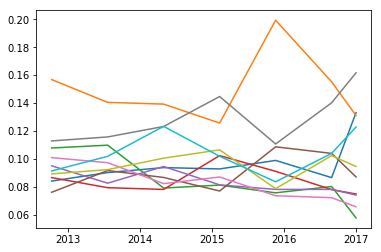

In [114]:
import matplotlib.pyplot as plt
plt.plot(dates,averages.T)